In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import datetime as dt

## Chargement des données

In [264]:
import requests

In [316]:
emoncms_key = 'f4b65fcf3f3f28c9af1d86bf362e7e5e'
emoncms_ip = '192.168.0.100'
DATAREQUESTLIMIT = 8928

In [317]:
def getfeedmeta( feed_id ):
    """ Get feed meta:
        interval, n points, start_time
    """ 
    query = 'http://%s/emoncms/feed/getmeta.json?id=%i&apikey=%s' \
            % (emoncms_ip, feed_id, emoncms_key  )
    r = requests.get(query)
    return r.json() 

In [320]:
def getfeeddata(feed_id, startdate=None, enddate=None, interval=None ):
    """ Get feed data
        startdate, enddate: pandas datetime
        interval: seconds
    """
    
    if not startdate:
        meta = getfeedmeta( feed_id )
        feed_interval = meta['interval']
        
        # Compute interval for full data range:
        start_unix = meta['start_time']*1000
        end_unix = int(  pd.to_datetime('today').timestamp() )*1000
        dt_range = (end_unix - start_unix)/1000
        interval = int( np.ceil( dt_range/DATAREQUESTLIMIT / feed_interval )*feed_interval )
    else:
        start_unix = int( startdate.timestamp() )*1000  # feed in milliseconds
        end_unix = int( enddate.timestamp() )*1000

    query = 'http://%s/emoncms/feed/data.json?id=%i&start=%i&end=%i&interval=%i&apikey=%s' \
            % (emoncms_ip, feed_id, start_unix, end_unix, interval,  emoncms_key  )

    r = requests.get(query)
    data = r.json()

    return data

In [489]:
def getTimeserie( feed_id, feed_name, dataframefreq, **timerangeparams  ):
    """ Pack data from emoncms into a Dataframe
        feed_name: column name
        dataframefreq: string, resample freq, averaging
    """
    
    data = getfeeddata( feed_id, **timerangeparams )
    Mesures = [ v[1] for v in data ]
    DateIndex = pd.to_datetime( [ v[0] for v in data ],  unit='ms' , origin='unix'  )
    
    df = pd.DataFrame( {feed_name:Mesures}, index=DateIndex )
    df = df.resample(dataframefreq).mean().interpolate()

    return df

In [490]:
## Minimal interval
#datarequest_limit = 8928
#interval = 15

#end_unix = start_unix + datarequest_limit*interval*1000

In [491]:
feed_id = 3
startdate = pd.to_datetime('24/06/2017', format='%d/%m/%Y')
enddate = pd.to_datetime('today')

interval = 600

In [492]:
getfeeddata( feed_id, startdate=startdate, enddate=enddate, interval=interval )

[[1498255800000, 30.700000762939],
 [1498264800000, 30],
 [1498266000000, 29.89999961853],
 [1498267200000, 29.89999961853],
 [1498268400000, 29.799999237061],
 [1498269600000, 29.700000762939],
 [1498282200000, 28.89999961853],
 [1498283400000, 29],
 [1498287000000, 29.10000038147],
 [1498297200000, 29.60000038147],
 [1498298400000, 29.700000762939],
 [1498303200000, 29.89999961853],
 [1498311000000, 30.39999961853],
 [1498312200000, 30.5],
 [1498313400000, 30.60000038147],
 [1498314600000, 30.700000762939],
 [1498315800000, 30.799999237061],
 [1498322400000, 31.200000762939],
 [1498324800000, 31.200000762939],
 [1498336200000, 31],
 [1498345200000, 29.39999961853],
 [1498346400000, 29.200000762939],
 [1498347600000, 28.89999961853],
 [1498348800000, 28.700000762939],
 [1498352400000, 28.60000038147],
 [1498368600000, 27.5],
 [1498369800000, 27.5],
 [1498372200000, 27.10000038147],
 [1498374600000, 26.5],
 [1498378200000, 26.700000762939],
 [1498380600000, 26.799999237061],
 [14983818

In [493]:
getfeedmeta( 3 )

{'interval': 15, 'npoints': 28216, 'start_time': 1498058505}

In [494]:
feed_id = 2
feed_name = 'T_ext'

dataframefreq = '10min'

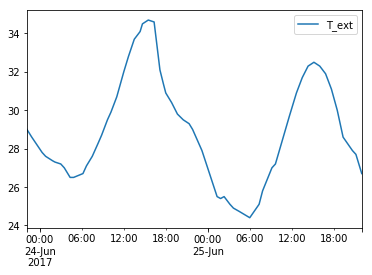

In [495]:
getTimeserie( feed_id, feed_name, dataframefreq, startdate=startdate, enddate=enddate, interval=interval  ).plot()

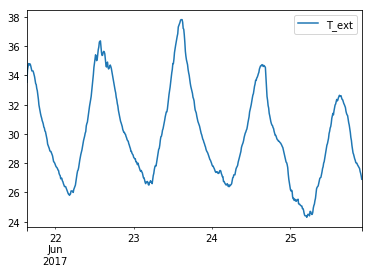

In [496]:
getTimeserie( feed_id, feed_name, dataframefreq  ).plot()

In [512]:
feeds =  { 'T_ext':2, 'T_int':3 }

In [513]:
D = []
for  feed_name, feed_id in feeds.items():
    D.append( getTimeserie( feed_id, feed_name, dataframefreq  )  )
    
df = pd.concat( D, axis=1)

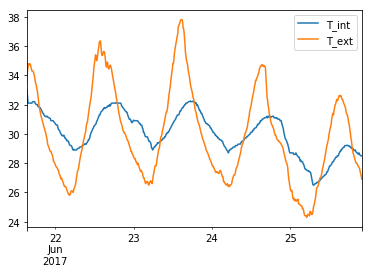

In [515]:
df.plot();

In [399]:
Mesures = [ v[1] for v in data ]
DateIndex = pd.to_datetime( [ v[0] for v in data ],  unit='ms' , origin='unix'  )

In [400]:
df = pd.DataFrame( {feed_name:Mesures}, index=DateIndex )
df = df.resample(dataframefreq).mean().interpolate()

In [401]:
df

,T_ext
2017-06-21 15:20:00,42.633334
2017-06-21 15:30:00,41.550001
2017-06-21 15:40:00,42.099998
2017-06-21 15:50:00,41.700001
2017-06-21 16:00:00,41.000000
2017-06-21 16:10:00,40.799999
2017-06-21 16:20:00,40.600000
2017-06-21 16:30:00,40.200001
2017-06-21 16:40:00,39.900000
2017-06-21 16:50:00,39.599998


(array([  135.,   180.,   315.,   450.,   495.,   585.,   630.,   765.,
          810.,   900.,   945.,  1080.,  1215.,  1260.,  1395.,  1530.,
         1575.,  1890.]),
 array([352, 278, 328,  81,  20,   1,  60,  19,   1,   5,  16,   6,   2,
          2,   5,   1,   1,   1]))

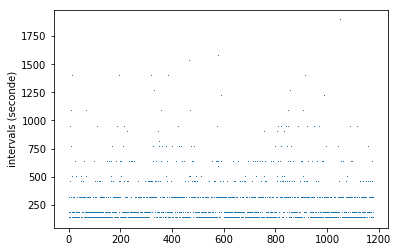

In [276]:
## Quels sont les intervals réels ?

intervals = np.array( [ (data[k+1][0]-data[k][0] )/1000 for k in range(len(data)-1)  ] )

plt.plot( intervals, ',' ); plt.ylabel('intervals (seconde)')

np.unique(intervals,  return_counts=True )

In [21]:
def dateparse( time_in_secs ):    
    return dt.datetime.fromtimestamp(float(time_in_secs))

In [3]:
T_ext_file = '2.csv'
T_int_file = '3.csv'

In [4]:
df2 = pd.read_csv('./data/'+T_ext_file, header=None, index_col=0, parse_dates=True, \
                 date_parser=dateparse, names=['DateTime', 'T2'])

df1 = pd.read_csv('./data/'+T_int_file, header=None, index_col=0, parse_dates=True, \
                 date_parser=dateparse, names=['DateTime', 'T1']) 

In [5]:
len( df1 )

3879

### resample

In [6]:
df_int = df1.resample('10min').mean().interpolate()
df_ext = df2.resample('10min').mean().interpolate()

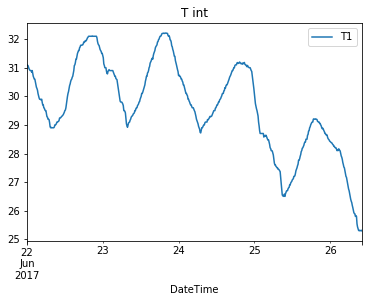

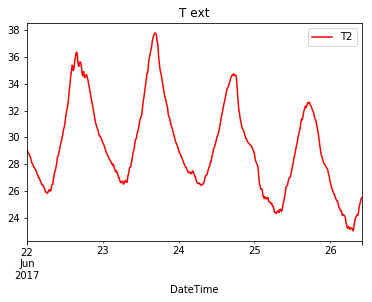

In [7]:
df_int.plot(title='T int')
df_ext.plot(color='r', title='T ext')

In [8]:
# To array :
T_ext = df_ext.as_matrix().flatten()
T_int = df_int.as_matrix().flatten()

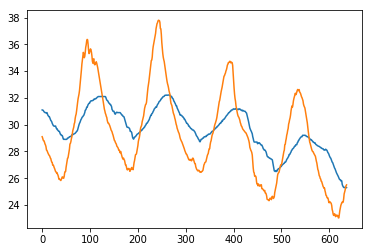

In [9]:
plt.plot( T_int )
plt.plot( T_ext )

## Modèle linéaire

$$
m.C_p \, \frac{dT}{dt} = S.h\,( T - T_{ext} )
$$

Avec $m.Cp$ la masse thermique, $S$ la surface avec l'extérieure et $h$ le coefficient d'échange

On pose:
$$
\beta = \frac{S.h}{m.C_p}
$$

et en pasant par les transformées de Fourier: 
$$
\tilde T = \frac{\beta}{\beta + 2\pi i \, f } \tilde T_{ext}
$$

In [10]:
def model_Text( beta,  T_ext ):
    
    # TF (reel)
    TF_ext = np.fft.rfft( T_ext  )
    freq = np.fft.rfftfreq( T_ext.size, d=1)
    
    freq = freq/( 10*60 )  # resample freq
    
    # modele
    TF_theo = beta/( beta + 2j*np.pi*freq )*TF_ext

    # TF inverse
    T_theo = np.fft.irfft( TF_theo , n=T_ext.size )
    
    return T_theo

In [11]:
from scipy.optimize import fmin

def errorfit( param ):
    T_theo = model_Text( param, T_ext )
    
    return np.sum( (T_int - T_theo)**2 )

In [12]:
errorfit( 80 )

4238.6519804779982

In [13]:
import random

In [15]:
best_fopt = 1e8
best_param = []

for k in range( 20 ):
    beta = random.choice( np.logspace( -5, 0, 30) )
    
    paramZero = beta
    res = fmin(errorfit, paramZero, disp=False, full_output =True)

    paramOpt, fopt = res[:2]
    if best_fopt > fopt:
        best_param = paramOpt
        best_fopt = fopt
        
    
print( best_fopt ) #  best_params )
print( best_param )

1071.87425916
[  3.09944153e-05]


In [16]:
## beta : 2.65585250e-05

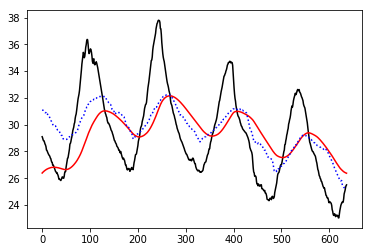

In [17]:
T_theo = model_Text( 2.33e-05, T_ext )

plt.plot(T_ext, 'k')
plt.plot(T_theo, 'r')
plt.plot(T_int, ':b');

$$
beta = \frac{S . h}{ M.Cp }
$$

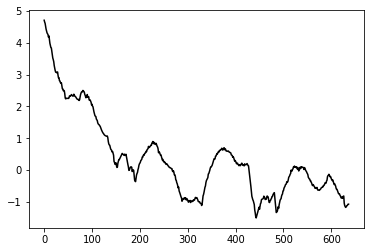

In [18]:
plt.plot(T_int-T_theo, 'k')

In [19]:
print( T_int.mean() )
print( T_ext.mean() )

29.6397850166
29.277192071
